In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# 1.Data preparation and visualization 

### 1.1 Read data

In [2]:
raw_data = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 1.2 Remove Duplicates(if any)

In [4]:
data = raw_data.drop_duplicates(subset="customerID",keep="first")
data.shape

(7043, 21)

### 1.2 **Explortary analysis**

In [5]:
raw_data.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,6384-VMJHP,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [10]:
data["SeniorCitizen"] = data["SeniorCitizen"].astype(object)
data=data.replace(" ",np.nan)
data["TotalCharges"] = data["TotalCharges"].astype("float64")
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
cate_vars = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines",
             "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
             "TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling",
            "PaymentMethod"]
num_vars = ["tenure","MonthlyCharges","TotalCharges"]

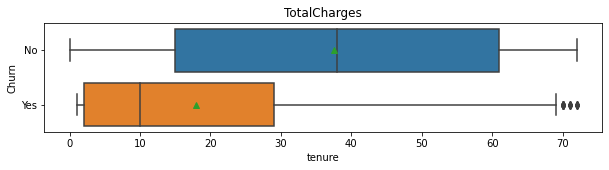

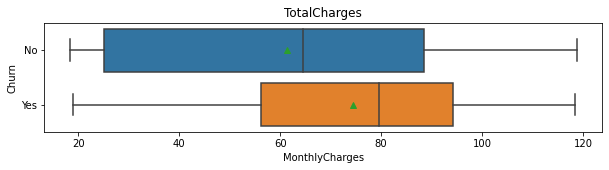

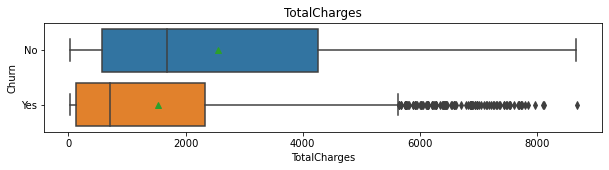

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in num_vars:
    plt.figure(figsize=(10,2))
    sns.boxplot(x = var,y ="Churn",data = data, showmeans= True)
    plt.title(i)
    plt.show()

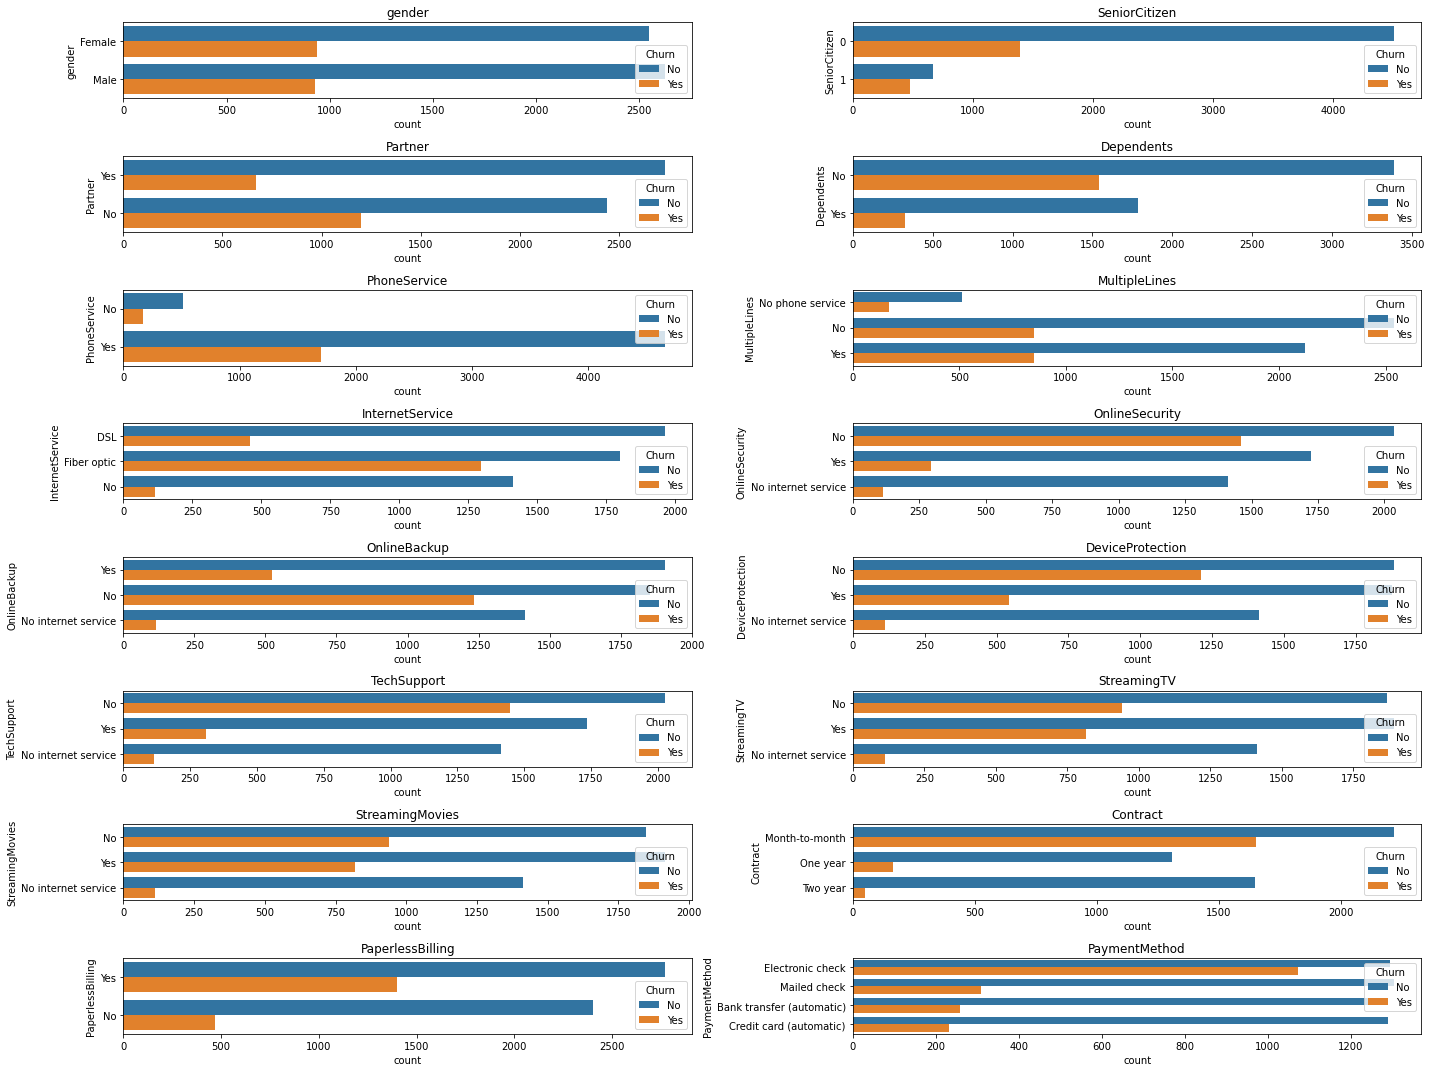

In [15]:
fig,axes = plt.subplots(8,2,figsize = (20,15))
axes = axes.flatten()

for i in range(len(cate_vars)):
    sns.countplot(y = cate_vars[i], hue = "Churn", data = data, ax = axes[i])
    axes[i].set_title(cate_vars[i])
plt.tight_layout()

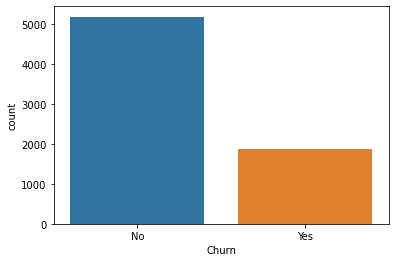

In [16]:
sns.countplot("Churn",data = data)

As we can see, the data is not balanced. There are serval ways to address that. One esay way is to use AUC as our scoring method

##### Plot a pairplot

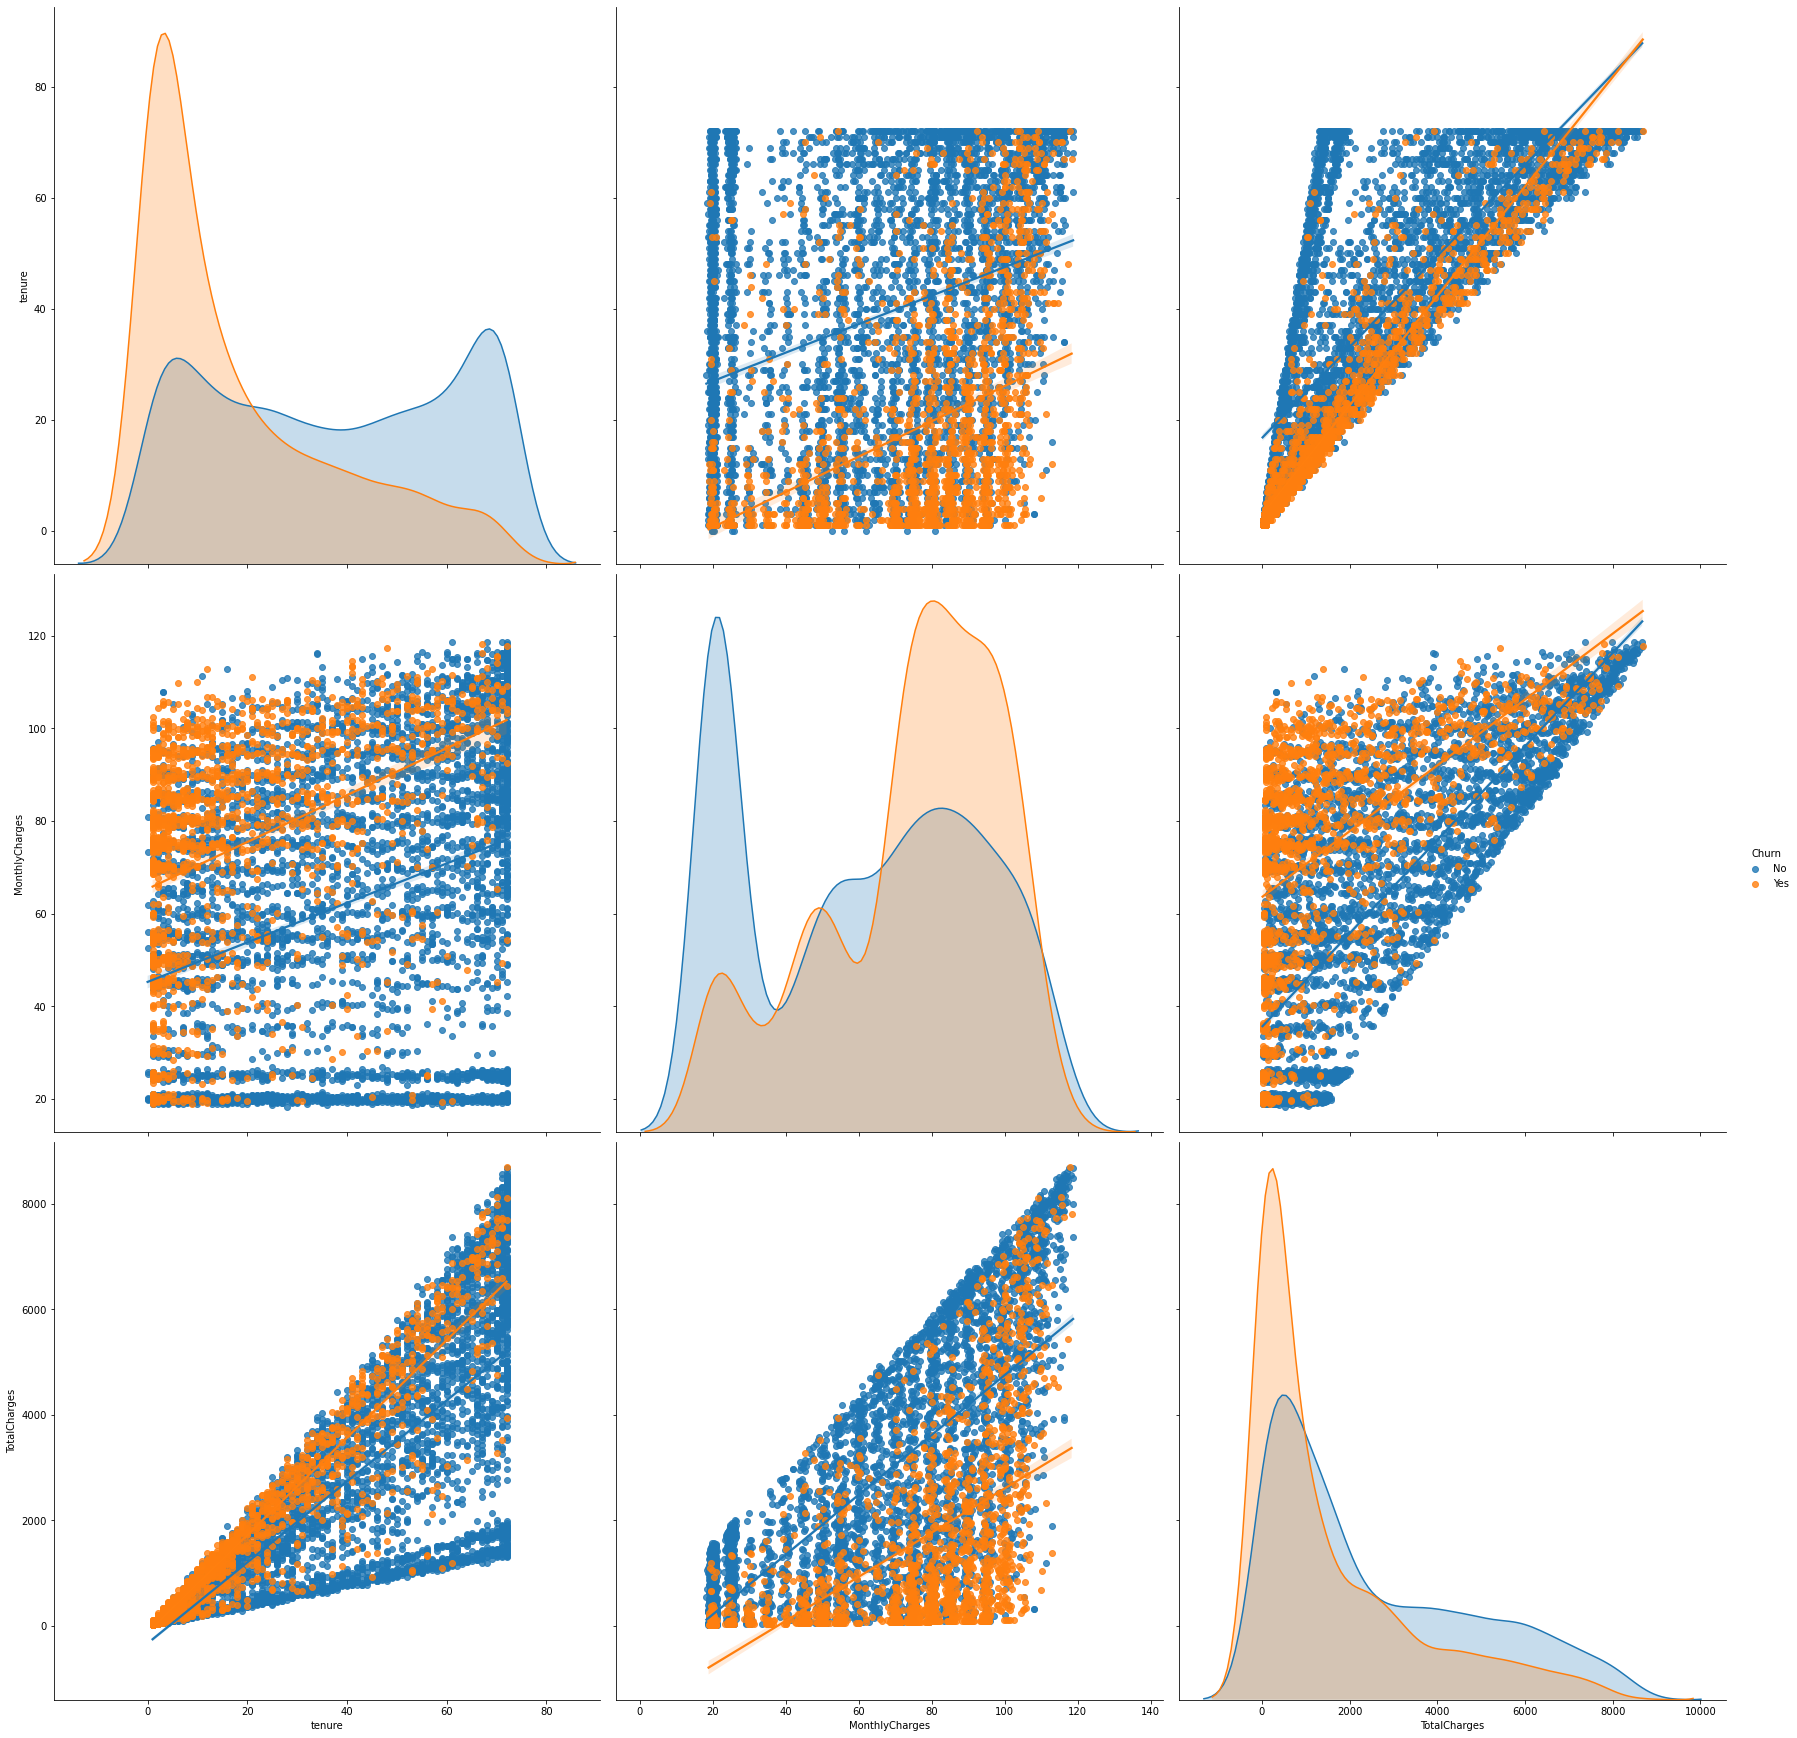

In [18]:
sns.pairplot(data = data, hue="Churn", vars = num_vars, height = 8, kind = "reg")

#  2. Feature Engineering
### 2.1 remove irelevant data

In [20]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.drop("customerID", axis = 1, inplace = True)
data.columns

In [23]:
data = data.dropna()

In [24]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2.2 One-hot encoding

In [25]:
data = pd.get_dummies(data)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   gender_Female                            7032 non-null   uint8  
 4   gender_Male                              7032 non-null   uint8  
 5   SeniorCitizen_0                          7032 non-null   uint8  
 6   SeniorCitizen_1                          7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

In [27]:
X = data.iloc[:,:45]
y = data.iloc[:,46]

### 2.3 Split training and testing set

In [28]:
from sklearn.model_selection import train_test_split
seed = 666
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = 0.3,
                                                stratify = y,
                                                random_state = seed
                                               )
print("X_train's shape:{}, y_train's shape:{}".format(X_train.shape,y_train.shape))
print("X_test's shape:{}, y_test's shape:{}".format(X_test.shape, y_test.shape))

X_train's shape:(4922, 45), y_train's shape:(4922,)
X_test's shape:(2110, 45), y_test's shape:(2110,)


### 2.4 Variance Threshold

##### 2.3.1 Filter - VarianceThreshold

In [29]:
from sklearn.feature_selection import VarianceThreshold
# VAR(X) = P(1-P)
threshold = 0.95
vt = VarianceThreshold()
vt.fit(X_train)
feat_vt = X.columns[vt.variances_ > threshold*(1-threshold)]
print("Features left:", len(vt.variances_))

Features left: 45


##### 2.3.2 Filter - Chi-2 test

In [30]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
# make sure all features are positive before applying chi2 test
X_minmax = MinMaxScaler(feature_range = (0,1)).fit_transform(X_train)
model = SelectKBest(score_func = chi2, k = "all")
X_scores = model.fit(X_minmax, y_train)
chi2_table = pd.DataFrame({"Features": X_train.columns,
                           "Chi2 Score": X_scores.scores_}
                         )
chi2_table = chi2_table.sort_values(["Chi2 Score"], ascending = False)
chi2_20 = chi2_table.loc[:20, "Features"].values # return an array, not a list

2.3.3 Recursive Feature Elimination(RFE)

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe = RFE(LogisticRegression(max_iter = 100000), 
          n_features_to_select = 20
         )
rfe.fit(X_train, y_train)
rfe_scores = pd.DataFrame({"Features":X_train.columns,
                          "RFE Score":rfe.ranking_})

In [32]:
rfe_scores = rfe_scores.sort_values(["RFE Score"],
                                    ascending = False
                                   )
rfe_20 = rfe_scores.loc[:20,"Features"].values
rfe_20

array(['TotalCharges', 'DeviceProtection_No', 'Dependents_No',
       'MonthlyCharges', 'DeviceProtection_Yes', 'Contract_One year',
       'gender_Female', 'tenure', 'StreamingTV_No', 'StreamingMovies_No',
       'MultipleLines_Yes', 'MultipleLines_No', 'StreamingMovies_Yes',
       'SeniorCitizen_1', 'OnlineBackup_No internet service',
       'gender_Male', 'InternetService_No', 'TechSupport_Yes',
       'TechSupport_No internet service', 'OnlineSecurity_Yes',
       'OnlineSecurity_No internet service'], dtype=object)

2.3.4 Feature Importance Top 20

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
feat_imp_scores = pd.DataFrame({"Feature":X_train.columns,
                               "Importance":model.feature_importances_}
                              )
feat_imp_scores = feat_imp_scores.sort_values(["Importance"],ascending=  False)
feat_imp_20 = feat_imp_scores.loc[:20,"Feature"].values
feat_imp_20

array(['TotalCharges', 'tenure', 'MonthlyCharges',
       'Contract_Month-to-month', 'PaymentMethod_Electronic check',
       'TechSupport_No', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'gender_Male', 'OnlineBackup_No',
       'gender_Female', 'Partner_Yes', 'PaperlessBilling_Yes',
       'PaperlessBilling_No', 'Partner_No', 'MultipleLines_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)', 'Contract_Two year',
       'SeniorCitizen_1', 'DeviceProtection_No', 'MultipleLines_No',
       'SeniorCitizen_0', 'Dependents_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'Dependents_No', 'StreamingTV_Yes',
       'OnlineSecurity_Yes', 'StreamingMovies_No', 'StreamingTV_No',
       'StreamingMovies_Yes', 'InternetService_DSL', 'TechSupport_Yes',
       'Contract_One year', 'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'PhoneService_No',
       'MultipleLines_No phone service', 'Phone

2.3.4 Final Feature Selection 

In [34]:
# no Variance 
final_feat = np.concatenate([rfe_20,feat_imp_20,chi2_20])
final_feat = np.unique(final_feat)
print(final_feat)
print(len(final_feat))

['Contract_Month-to-month' 'Contract_One year' 'Contract_Two year'
 'Dependents_No' 'Dependents_Yes' 'DeviceProtection_No'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'InternetService_DSL' 'InternetService_Fiber optic' 'InternetService_No'
 'MonthlyCharges' 'MultipleLines_No' 'MultipleLines_No phone service'
 'MultipleLines_Yes' 'OnlineBackup_No' 'OnlineBackup_No internet service'
 'OnlineBackup_Yes' 'OnlineSecurity_No'
 'OnlineSecurity_No internet service' 'OnlineSecurity_Yes'
 'PaperlessBilling_No' 'PaperlessBilling_Yes' 'Partner_No' 'Partner_Yes'
 'PaymentMethod_Bank transfer (automatic)'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PhoneService_No' 'PhoneService_Yes' 'SeniorCitizen_0' 'SeniorCitizen_1'
 'StreamingMovies_No' 'StreamingMovies_No internet service'
 'StreamingMovies_Yes' 'StreamingTV_No' 'StreamingTV_No internet service'
 'StreamingTV_Yes' 'TechSupport_No' 'TechSupport_No internet service'
 'TechSupport_Yes' 'TotalChar

In [35]:
#get dataframe
X_train =X_train.loc[:,final_feat]
X_test = X_test.loc[:,final_feat]

# 3.Model Selection

### 3.1 Model Spot Check

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.model_selection import cross_val_score

In [37]:
models = {"Linear Regression":LinearRegression(),
          "LDA": LinearDiscriminantAnalysis(),
          "CART":DecisionTreeClassifier(),
          "SVM": SVC(),
         "AdaBoost":AdaBoostClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Gradient Boosting": GradientBoostingClassifier()}

In [39]:
scoring = "roc_auc"
seed = 666
for clf in models:
    score = cross_val_score(models[clf], X_train, y_train, 
                            scoring = scoring, cv = 3
                           )
    print("{0}:{1:.3f} +/-{2:.3f} ".format(clf,np.mean(score), np.std(score)))
    

Linear Regression:0.832 +/-0.005 
LDA:0.832 +/-0.006 
CART:0.666 +/-0.013 
SVM:0.790 +/-0.013 
AdaBoost:0.840 +/-0.012 
Random Forest:0.821 +/-0.013 
Gradient Boosting:0.839 +/-0.010 


As we can see, the ensemble models usually have a better performance. Here we will select **Linear Regression**, **RandomForest**, **Adaboost** and **Gradient Boosting** for our final models 

### 3.2 Model Tuning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score

##### 3.2.1 Logistic Regression

In [42]:
def LR_model(X_train_cv, y_train_cv, X_val, y_val, C, penalty = "l2"):
    scaler = StandardScaler().fit(X_train_cv)
    X_train_cv = scaler.transform(X_train_cv)
    X_val = scaler.transform(X_val) 
    if penalty == "l2":
        clf = LogisticRegression(C = C, penalty="l2")
    else:
        clf = LogisticRegression(C = C, solver = "liblinear",penalty="l1")
    clf.fit(X_train_cv,y_train_cv)
    y_val_pred = clf.predict(X_val)
    y_val_proba = clf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_val_proba)
    acc = accuracy_score(y_val,y_val_pred)
    return auc, acc

In [43]:
def LR_cv(X,y,Cs,penalty):
    kf = KFold(n_splits = 3)
    scores = {}
    for train_idx,val_idx in kf.split(X):
        X_train_cv, y_train_cv = X_train.iloc[train_idx,:],y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx,:], y_train.iloc[val_idx]
        for C in Cs:
            score,_ = LR_model(X_train_cv,y_train_cv,
                            X_val,y_val,
                               C,penalty)          
            if C not in scores:
                scores[C] = []
                scores[C].append(score)
            else:
                scores[C].append(score)
    return scores
        

In [44]:
Cs = [0.01, 0.1, 0.3, 1, 3, 10, 30]
aucs_l1 = LR_cv(X_train, y_train,Cs, penalty = "l1")
aucs_l2 = LR_cv(X_train, y_train,Cs, penalty = "l2")

In [45]:
def get_best_params(dict1):
    best_mean_auc = 0
    mean_aucs = []
    for key in dict1:
        mean_auc = np.mean(dict1[key])
        if best_mean_auc < mean_auc:
            best_mean_auc = mean_auc
            best_C = key
        mean_aucs.append(mean_auc)
    return best_C, best_mean_auc, mean_aucs

In [46]:
best_C_l1, best_aucs_l1, mean_aucs_l1 = get_best_params(aucs_l1)
print("L1:", best_C_l1, best_aucs_l1)

L1: 3 0.8402803936992843


In [47]:
best_C_l2, best_aucs_l2,mean_aucs_l2 = get_best_params(aucs_l2)
print("L2:",best_C_l2, best_aucs_l2)

L2: 10 0.8401907039924171


In [48]:
def plot_mean_auc_LR(Cs,aucs,penalty):
    plt.plot(Cs, aucs, label = penalty)
    plt.xlabel("Cs")
    plt.ylabel("AUCs")
    plt.legend()

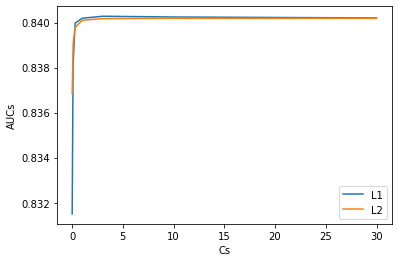

In [49]:
plot_mean_auc_LR(Cs,mean_aucs_l1,"L1")
plot_mean_auc_LR(Cs,mean_aucs_l2,"L2")

As we can see, 12 is only slightly better than l1.

##### 3.2.2 Random Forest

In [50]:
from sklearn import metrics
def rf_model(X_train_cv, y_train_cv, X_val, y_val, lf, sp):
    scaler = StandardScaler().fit(X_train_cv)
    
    X_train_cv = scaler.transform(X_train_cv)
    X_val = scaler.transform(X_val)
    
    clf = RandomForestClassifier(min_samples_leaf=lf,
                                 min_samples_split= sp,n_jobs = -1
                                )
    
    clf.fit(X_train_cv,y_train_cv)
    
    y_val_pred = clf.predict(X_val)
    y_val_proba = clf.predict_proba(X_val)[:,1]
    
    auc = metrics.roc_auc_score(y_val, y_val_proba)
    acc = metrics.accuracy_score(y_val, y_val_pred)
    
    return auc, acc

In [54]:
def rf_cv(X_train, y_train, leaf, split, cv):
    kf = KFold(n_splits=cv)
    aucs={}
    
    for train_idx, val_idx in kf.split(X_train):
        X_train_cv, y_train_cv = X_train.iloc[train_idx,:], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx,:],y_train.iloc[val_idx]
        for lf in leaf:
            for sp in split:
                auc, acc = rf_model(X_train_cv, y_train_cv,
                                    X_val, y_val,
                                    lf,sp
                                   )
                key = str(lf)+"&"+str(sp) 
                if key in aucs:
                    aucs[key].append(auc)
                else:
                    aucs[key]=[]
                    aucs[key].append(auc)
                    
    return aucs

In [56]:
leaf = np.geomspace(5, 200, num=10, dtype=int)
split = np.geomspace(10, 2000, num=10, dtype=int)

aucs = rf_cv(X_train, y_train, leaf, split, cv=3)

In [57]:
def rf_get_best_param(dict1):
    mean_aucs=[]
    best_mean_auc = 0
    best_params=(0,0)
    for key in dict1:
        mean_auc = np.mean(dict1[key])
        mean_aucs.append(mean_auc)
        if best_mean_auc < mean_auc:
            best_mean_auc = mean_auc
            best_params = tuple(map(int,key.split("&")))
    return best_params,best_mean_auc, mean_aucs

best_params_rf, best_mean_auc, mean_aucs = rf_get_best_param(aucs)
print("Best leaf is {} and best split is {}".format(best_params_rf[0], best_params_rf[1]))
print("Best mean_auc is ", best_mean_auc)

Best leaf is 17 and best split is 32
Best mean_auc is  0.8428994617249379


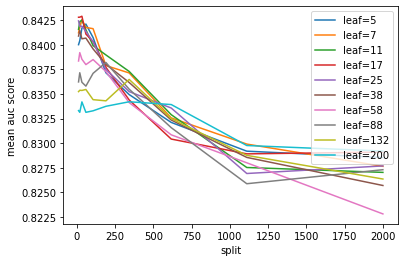

In [58]:
def rf_plot(leaf,split,mean_aucs):
    for i in range(len(leaf)):
        plt.plot(split,mean_aucs[len(split)*i:len(split)*i+len(split)],
                label = "leaf="+str(leaf[i]))
    plt.xlabel("split")
    plt.ylabel("mean auc score")
    plt.legend()
rf_plot(leaf, split, mean_aucs)

### 3.2.3 Adaboost

In [59]:
def ada_model(X_train_cv, y_train_cv, X_val, y_val, n = 100):
    from sklearn.tree import DecisionTreeClassifier
    
    dt_stump =  DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1)
    
    clf = AdaBoostClassifier(base_estimator = dt_stump, n_estimators = n)
    #No need to standardize training data in tree models    
    clf.fit(X_train_cv,y_train_cv)
    
    y_pred = clf.predict(X_val)
    y_val_proba = clf.predict_proba(X_val)[:,1]
    
    auc = metrics.roc_auc_score(y_val,y_val_proba)
    acc = metrics.accuracy_score(y_val,y_pred)
    
    return auc, acc

In [60]:
def ada_cv(X_train, y_train, ns, cv = 3):
    aucs = {}
    kf = KFold(n_splits = cv)
    
    for train_idx, val_idx in kf.split(X_train):
        X_train_cv,y_train_cv = X_train.iloc[train_idx,:], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx,:], y_train.iloc[val_idx]
        
        for n in ns:
            auc, _ = ada_model(X_train_cv, y_train_cv,
                               X_val, y_val, n = n
                              )
            if n in aucs:
                aucs[n].append(auc)
            else:
                aucs[n] = []
                aucs[n].append(auc)
    return aucs

In [62]:
ns = np.array([50,100,400,600,1000,2000])
aucs = ada_cv(X_train, y_train, ns, cv = 3)

In [63]:
def get_mean_auc(dict1):
    best_mean_auc = 0
    best_n = 0
    mean_aucs = []
    for key in dict1:
        mean_auc = np.mean(dict1[key])
        mean_aucs.append(mean_auc)
        if best_mean_auc < mean_auc:
            best_mean_auc  = mean_auc
            best_n = key
    return best_n, best_mean_auc, mean_aucs
best_n,best_mean_auc,mean_aucs = get_mean_auc(aucs)

In [64]:
print("Best n_estimators:",best_n)
print("Best mean auc score:", best_mean_auc)

Best n_estimators: 50
Best mean auc score: 0.8403536821251425


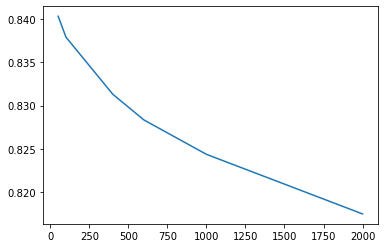

In [65]:
def ada_plot(ns,mean_aucs):
    plt.plot(ns,mean_aucs)
ada_plot(ns,mean_aucs)

In [66]:
model = GridSearchCV(estimator=AdaBoostClassifier(), scoring = "roc_auc",
                     param_grid={"n_estimators":ns}
                    )
model.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': array([  50,  100,  400,  600, 1000, 2000])},
             scoring='roc_auc')

### 3.2.4 XgBoost

In [67]:
def xgb_model(X_train_cv, y_train_cv, X_val, y_val, lf, sp):
    clf = GradientBoostingClassifier(min_samples_split = sp, min_samples_leaf= lf)
    clf.fit(X_train_cv,y_train_cv)
    
    y_val_pred = clf.predict(X_val)
    y_val_proba = clf.predict_proba(X_val)[:, 1]
    
    acc = metrics.accuracy_score(y_val,y_val_pred)
    auc = metrics.roc_auc_score(y_val,y_val_proba)
    
    feat_imp = clf.feature_importances_
    
    return auc,acc,feat_imp

In [70]:
def xgb_cv(X_train, y_train, leaf, split, cv = 5):
    kf = KFold(n_splits = cv)
    aucs = {}
    
    for train_idx, val_idx in kf.split(X_train):
        X_train_cv, y_train_cv = X_train.iloc[train_idx, :], y_train.iloc[train_idx]
        X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
        
        for sp in split:
            for lf in leaf:
                auc, acc, imp = xgb_model(X_train_cv, y_train_cv,
                                          X_val, y_val,
                                          lf= lf, sp = sp
                                         )
                key = str(sp) + "&" + str(lf)
                if key in aucs:
                    aucs[key].append(auc)
                else:
                    aucs[key] = []
                    aucs[key].append(auc)                    
    return aucs 

In [69]:
gbsplit= np.geomspace(10, 1500, num = 8, dtype = int)
gbleaf = np.geomspace(5, 750, num = 6, dtype = int)
gbaucs = xgb_cv(X_train, y_train, leaf = gbleaf, split = gbsplit,cv =5)

In [71]:
def xgb_get_best_param(dict1):
    mean_aucs = []
    best_mean_auc = 0
    best_params = ()
    for key in dict1:
        mean_auc = np.mean(dict1[key])
        mean_aucs.append(mean_auc)
        if best_mean_auc < mean_auc:
            best_mean_auc = mean_auc
            best_params = tuple(map(int,key.split("&")))
    return best_params, best_mean_auc, mean_aucs
best_params, best_mean_auc, mean_aucs = xgb_get_best_param(gbaucs)
print("Best split is {}\nBest leaf is {}".format(*best_params))
print("Best mean auc is {:.4f}".format(best_mean_auc))

Best split is 1500
Best leaf is 275
Best mean auc is 0.8453


# 4 Final Prediction

Given the test results after hyparameters tuning, Xgboost's performance is the best. Hence, I will use the it for the final prediction.

In [72]:
final_auc,acc,imp = xgb_model(X_train,y_train,X_test,y_test, sp = 10, lf = 275)
print("Final AUC is {}\nFinal accuracy is {}".format(final_auc,acc))

Final AUC is 0.854064896103403
Final accuracy is 0.8132701421800947


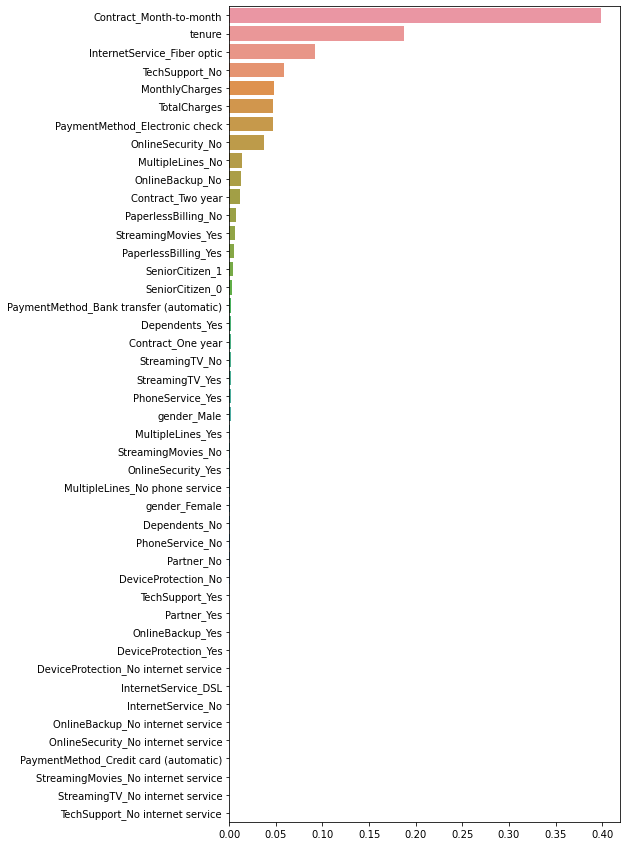

In [73]:
def plot_feat_imp(index,feat_imp):
    a = dict(zip(index,imp))
    a = sorted(a.items(), key = lambda x:x[1], reverse = True)
    a = dict(a)
    plt.figure(figsize = (7,15))
    sns.barplot(list(a.values()),list(a.keys()))
    
plot_feat_imp(list(X_test.columns), imp)

As for the feature importance, we can see that the most important features are(Descending):
* contract Month to Month,
* tenure, 
* Online security-No,
* Internet Survice-Fiber optic,
* Monthly Charges
* Total Charges
* Payment Method - Electronic Check
* It Support - No